# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Description
1. It looks like the latitude does affect the max temperature in the southern hemisphere and the northern hemisphere. In the northern hemisphere, the relation is negative as latitude increases. In the southern hemisphere, the relation is positive as latitude increases.
    
     
     
2. For wind speed, the north and south are both around 0mph to 20mph. But, they don't have a strong linear relationship with latitude. 
     
     
     
3. For humidity, it also doesn't really have a strong linear relationship either. However, most of the cities have a humidity between 80 and 100. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# weather data
basic_url = "http://api.openweathermap.org/data/2.5/weather?"
query = f"{basic_url}appid={weather_api_key}&units=imperial&q="
response_json =  requests.get(query + city).json()
print(json.dumps(response_json, indent=4))

{
    "coord": {
        "lon": 10.7002,
        "lat": 46.6166
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 63.39,
        "feels_like": 63.61,
        "temp_min": 60.37,
        "temp_max": 65.28,
        "pressure": 1025,
        "humidity": 89,
        "sea_level": 1025,
        "grnd_level": 926
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.81,
        "deg": 234,
        "gust": 2.24
    },
    "clouds": {
        "all": 8
    },
    "dt": 1662414523,
    "sys": {
        "type": 1,
        "id": 6813,
        "country": "IT",
        "sunrise": 1662352925,
        "sunset": 1662400217
    },
    "timezone": 7200,
    "id": 3175096,
    "name": "Laas",
    "cod": 200
}


In [4]:
Name = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    response_json =  requests.get(query + city).json()
    try:
        Name.append(response_json["name"]) 
        Lat.append(response_json["coord"]["lat"])
        Lng.append(response_json["coord"]["lon"])
        Max_Temp.append(response_json["main"]["temp_max"])
        Cloudiness.append(response_json["clouds"]["all"])
        Humidity.append(response_json["main"]["humidity"])
        Wind_Speed.append(response_json["wind"]["speed"])
        Country.append(response_json["sys"]["country"])
        Date.append(response_json["dt"])
        print(f'Processing Record {len(Name)} of Set 1 | {response_json["name"]}')
    except:
        print('City not found. Skipping...')

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Ushuaia
Processing Record 2 of Set 1 | Marabu
Processing Record 3 of Set 1 | Busselton
Processing Record 4 of Set 1 | Antofagasta
Processing Record 5 of Set 1 | Guadalajara
Processing Record 6 of Set 1 | Port Alfred
Processing Record 7 of Set 1 | Rikitea
Processing Record 8 of Set 1 | Hasaki
Processing Record 9 of Set 1 | Castro
Processing Record 10 of Set 1 | Mahébourg
Processing Record 11 of Set 1 | Rancho Palos Verdes
Processing Record 12 of Set 1 | Port Hawkesbury
Processing Record 13 of Set 1 | Esperance
Processing Record 14 of Set 1 | Severo-Kuril'sk
Processing Record 15 of Set 1 | Pāsighāt
Processing Record 16 of Set 1 | Sümeg
Processing Record 17 of Set 1 | Jumla
Processing Record 18 of Set 1 | Maceió
Processing Record 19 of Set 1 | Bluff
Processing Record 20 of Set 1 | Vaini
City not found. Skipping...
Processing Record 21 of Set 1 | Evensk
Processing Record 22 of Set 1 | Copperas Cove
Proces

Processing Record 183 of Set 1 | Karratha
Processing Record 184 of Set 1 | Coyhaique
City not found. Skipping...
Processing Record 185 of Set 1 | Lanzhou
Processing Record 186 of Set 1 | Kadoma
Processing Record 187 of Set 1 | Kudahuvadhoo
Processing Record 188 of Set 1 | Aklavik
Processing Record 189 of Set 1 | Bilibino
Processing Record 190 of Set 1 | Xixiang
Processing Record 191 of Set 1 | Gouyave
Processing Record 192 of Set 1 | Marsh Harbour
City not found. Skipping...
City not found. Skipping...
Processing Record 193 of Set 1 | Estepona
Processing Record 194 of Set 1 | Asău
Processing Record 195 of Set 1 | Toora-Khem
Processing Record 196 of Set 1 | Geraldton
City not found. Skipping...
Processing Record 197 of Set 1 | Quryq
Processing Record 198 of Set 1 | Pyaozerskiy
Processing Record 199 of Set 1 | Huicheng
Processing Record 200 of Set 1 | Nanortalik
Processing Record 201 of Set 1 | Nome
Processing Record 202 of Set 1 | Homer
City not found. Skipping...
Processing Record 203 

Processing Record 362 of Set 1 | Port Lincoln
Processing Record 363 of Set 1 | Kiunga
Processing Record 364 of Set 1 | Rocha
Processing Record 365 of Set 1 | Villa María
Processing Record 366 of Set 1 | Dekar
Processing Record 367 of Set 1 | Egvekinot
Processing Record 368 of Set 1 | San Alberto
Processing Record 369 of Set 1 | Alta
Processing Record 370 of Set 1 | Fort-Shevchenko
Processing Record 371 of Set 1 | Antigonish
Processing Record 372 of Set 1 | Qaqortoq
Processing Record 373 of Set 1 | Soe
Processing Record 374 of Set 1 | Coquimbo
Processing Record 375 of Set 1 | Denpasar
Processing Record 376 of Set 1 | Comodoro Rivadavia
Processing Record 377 of Set 1 | Fuerte Olimpo
City not found. Skipping...
Processing Record 378 of Set 1 | San Patricio
Processing Record 379 of Set 1 | Tuburan
Processing Record 380 of Set 1 | Yangi Marg`ilon
Processing Record 381 of Set 1 | Buchanan
Processing Record 382 of Set 1 | Kirakira
Processing Record 383 of Set 1 | Tamandaré
Processing Record 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dataframe
weather_df = pd.DataFrame({
    "City" : Name,
    "Lat" : Lat,
    "Lng" : Lng,
    "Max Temp" : Max_Temp,
    "Humidity" : Humidity,
    "Cloudiness" : Cloudiness,
    "Wind Speed" : Wind_Speed,
    "Country" : Country,
    "Date" : Date 
})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,31.59,87,92,4.25,AR,1662414406
1,Marabu,4.4148,114.0089,71.74,100,40,2.30,MY,1662414525
2,Busselton,-33.6500,115.3333,49.51,88,100,3.24,AU,1662414526
3,Antofagasta,-23.6500,-70.4000,58.28,69,18,4.99,CL,1662414526
4,Guadalajara,20.6667,-103.3333,75.97,81,87,4.03,MX,1662414430


In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,20.381792,17.419382,66.668162,71.511029,58.670956,8.338860,1.662415e+09
std,34.121838,93.286624,16.003832,21.817843,40.084444,5.724553,1.041753e+02
min,-54.800000,-179.166700,31.480000,3.000000,0.000000,0.000000,1.662414e+09
25%,-8.971475,-67.446975,54.192500,63.000000,18.750000,4.157500,1.662415e+09
50%,28.083150,21.460400,69.370000,78.000000,75.000000,7.080000,1.662415e+09
75%,48.262500,103.804275,78.265000,87.000000,100.000000,11.025000,1.662415e+09
max,78.218600,179.316700,115.030000,100.000000,100.000000,37.290000,1.662415e+09


In [7]:
# save the data 
weather_df.to_csv("../output_data/weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_over100 = weather_df[(weather_df["Humidity"]>100)].index
weather_over100

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(weather_over100,inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,31.59,87,92,4.25,AR,1662414406
1,Marabu,4.4148,114.0089,71.74,100,40,2.30,MY,1662414525
2,Busselton,-33.6500,115.3333,49.51,88,100,3.24,AU,1662414526
3,Antofagasta,-23.6500,-70.4000,58.28,69,18,4.99,CL,1662414526
4,Guadalajara,20.6667,-103.3333,75.97,81,87,4.03,MX,1662414430


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

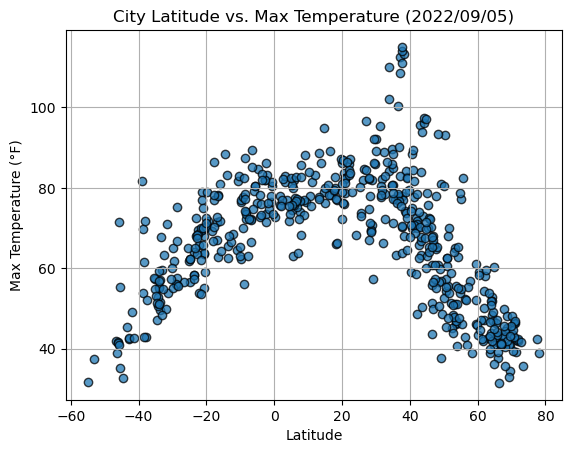

In [15]:



# Turn interactive plotting off
plt.ioff()

fig1 = plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
today = date.today(). strftime('%Y/%m/%d')
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/fig1.png')
plt.show()

From the graph, we know the latitude has postive relationship with the max temperature until around latitude = 20. However, the latitude starts to have a negative relationship after latitude is greater than 20. The Latitude has a bell shaped relationship with the max temperature.

## Latitude vs. Humidity Plot

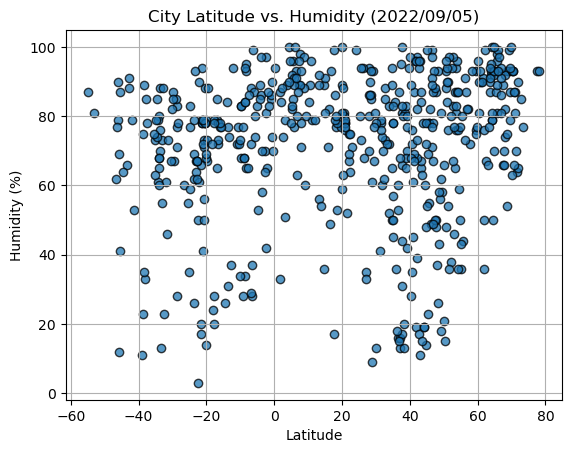

In [16]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
today = date.today(). strftime('%Y/%m/%d')
plt.title(f"City Latitude vs. Humidity ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/fig2.png')
plt.show()

From this graph, we know that the latitude and humidity don't really has obvious relationship. Most city humidity are from 60% to 100%. When the latitude is between -20 and 40, sometimes the humidity will drop to  around 20%.

## Latitude vs. Cloudiness Plot

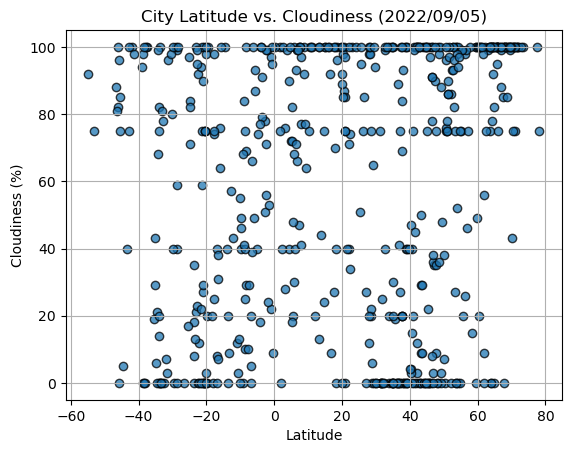

In [17]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
today = date.today(). strftime('%Y/%m/%d')
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/fig3.png')
plt.show()

From this graph, we know that the latitude and cloudiness also doesn't really have an obvious relationship. The data is spread out in the graph. Many cities are extremely less cloudy, which is around 0%. Other cities are extremely cloudy. 

## Latitude vs. Wind Speed Plot

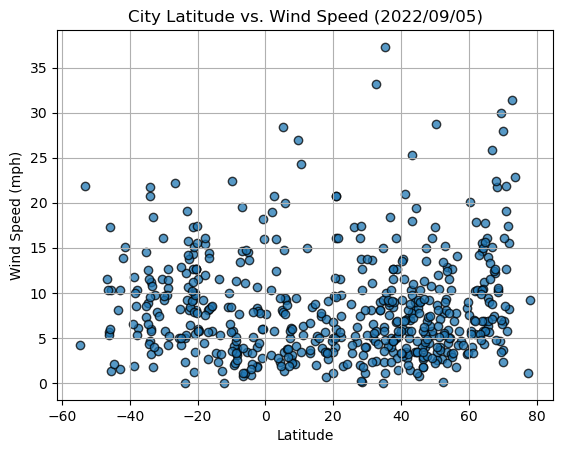

In [18]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
today = date.today(). strftime('%Y/%m/%d')
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/fig4.png')
plt.show()

From this graph, we know that the latitude and wind speed don't have relationship. Most cities have a wind speed from 0mph to 20mph and rare cities has high wind speed.

## Linear Regression

In [21]:
# Plot the different factors in a scatter plot
def linear_regression(x_values,y_values,x_name,y_name,coordinates,df):
    plt.scatter(x_values,y_values,edgecolor = "black",
                linewidth = 1, alpha = 0.75,marker = "o")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f'../output_data/{y_name}{df}.png')
    plt.show()
    
    
northern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5065433173195419


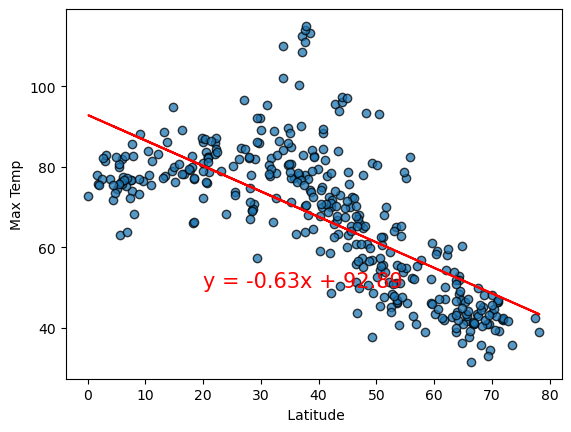

In [22]:
linear_regression(northern_hemi_weather_df["Lat"],northern_hemi_weather_df["Max Temp"]," Latitude","Max Temp",(20,50), "north")

From the plot, we know the maximum temperature in Northern Hemlsphere has negative linear relationship with latitude. By increasing one degree of latitude, the max termperature will decrease 0.63 temperature on average.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6430101313845584


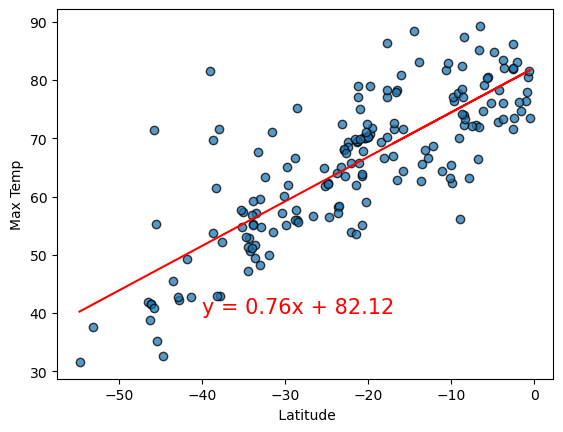

In [23]:
linear_regression(southern_hemi_weather_df["Lat"],southern_hemi_weather_df["Max Temp"]," Latitude","Max Temp",(-40,40), "south")

From the plot, we know the maximum temperature in Southern Hemisphere has strong positive linear relationship with latitude. By increasing one degree of latitude, the max termperature will increase 0.76 temperature on average.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0007014038061586641


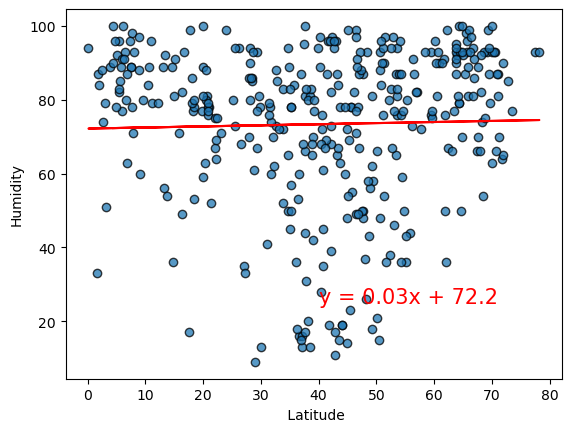

In [24]:
linear_regression(northern_hemi_weather_df["Lat"],northern_hemi_weather_df["Humidity"]," Latitude","Humidity",(40,25), "north")

From the plot, we know the Humidity in Northern Hemlsphere doesn't have linear relationship with latitude. Since the slope is around 0.03, it does't show strong negative linear relationship with the response humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010268152958890745


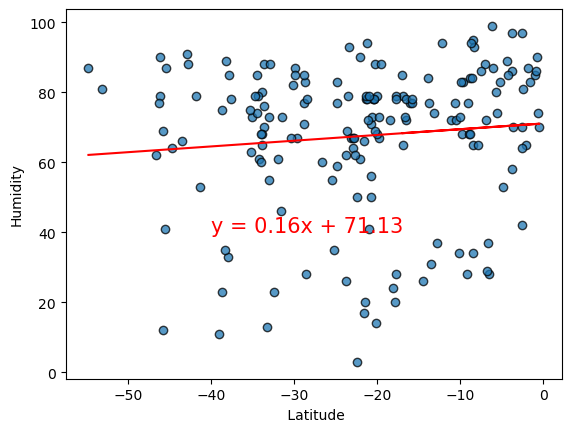

In [25]:
linear_regression(southern_hemi_weather_df["Lat"],southern_hemi_weather_df["Humidity"]," Latitude","Humidity",(-40,40), "south")

From the plot, we know the Humidity in Southern Hemisphere doesn't have linear relationship with latitude. Since the slope is around 0.16, it does't show strong postive linear relationship with the response humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01561776927013875


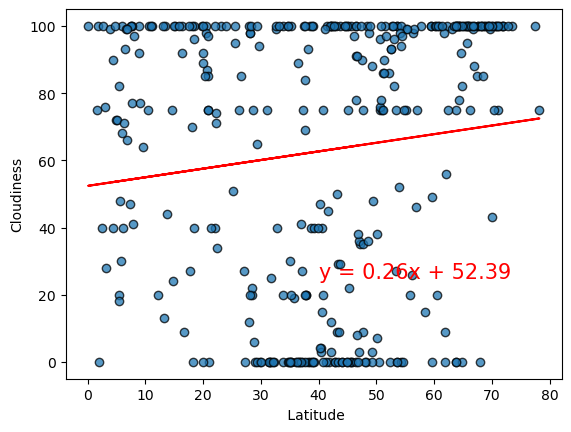

In [26]:
linear_regression(northern_hemi_weather_df["Lat"],northern_hemi_weather_df["Cloudiness"]," Latitude","Cloudiness",(40,25), "north")

From the plot, we know the Cloudiness in Northern Hemlsphere doesn't have linear relationship with latitude. Since the slope is around 0.26, it does't show strong negative linear relationship with the response cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002471138518639583


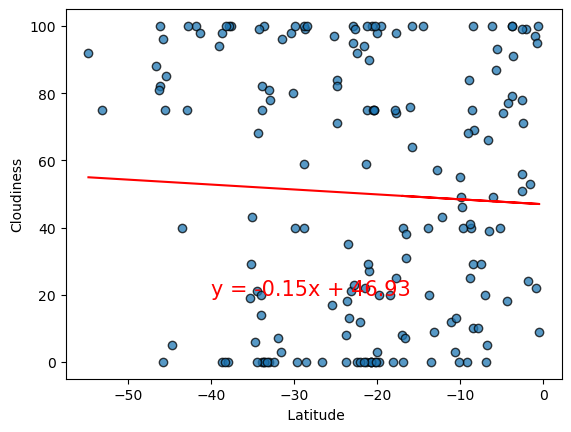

In [27]:
linear_regression(southern_hemi_weather_df["Lat"],southern_hemi_weather_df["Cloudiness"]," Latitude","Cloudiness",(-40,20), "south")

From the plot, we know the cloudiness in Southern Hemisphere doesn't have linear relationship with latitude. Since the slope is around -0.15, it does't show strong negative linear relationship with the response cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02088533743909114


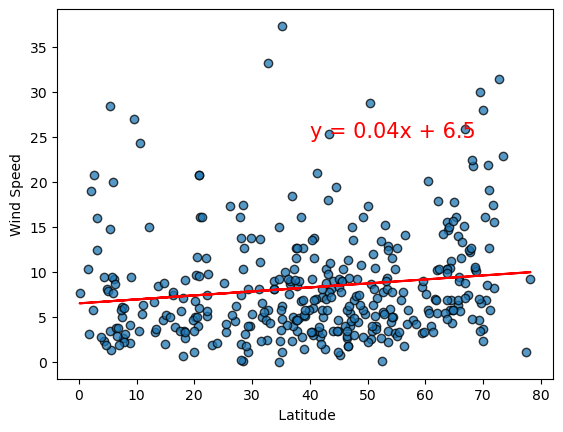

In [28]:
linear_regression(northern_hemi_weather_df["Lat"],northern_hemi_weather_df["Wind Speed"]," Latitude","Wind Speed",(40,25), "north")

From the plot, we know the wind speed in Northern Hemlsphere doesn't have linear relationship with latitude. Since the slope is around 0.04, it does't show strong positive linear relationship with the response wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027611755017594393


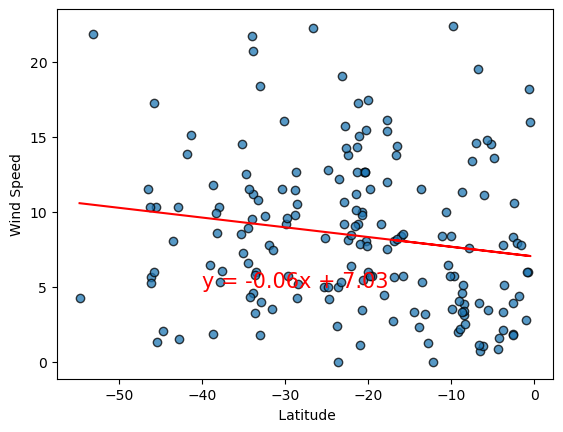

In [29]:
linear_regression(southern_hemi_weather_df["Lat"],southern_hemi_weather_df["Wind Speed"]," Latitude","Wind Speed",(-40,5), "south")

From the plot, we know the wind speed in Southern Hemisphere doesn't have linear relationship with latitude. Since the slope is around -0.06, it does't show strong negative linear relationship with the response wind speed.